# DS_TASK_03

## Importing Essential Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

## Reading CSV file

In [2]:
bank = pd.read_csv("bank-additional.csv", sep=";")

## Inspecting Data

In [3]:
print(bank.head())
print(bank.info())


   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.e

## Describing the data

In [4]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
bank.shape

(4119, 21)

In [7]:
bank.duplicated().sum()

np.int64(0)

## Data Preprocessing
Identifying all categorical columns except for the target (y).

Encodes categorical features numerically using label encoding.

The target column y is converted into binary numeric form: no to 0 and yes to 1.

In [8]:
# Encode categorical columns
categorical_cols = bank.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')

In [9]:
encoders = {}
for col in categorical_cols:
    encoders[col] = LabelEncoder()
    bank[col] = encoders[col].fit_transform(bank[col].astype(str))

In [10]:
# Encode target
bank['y'] = bank['y'].map({'no': 0, 'yes': 1})

## Splitting the data
The data will be split into training and test sets(80% train and 20% test)

In [11]:
X = bank.drop('y', axis=1)
y = bank['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model Training for Decision Tree Classifier

In [12]:

clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

## Evaluating the accuracy score and classification report

In [13]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8980582524271845
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       734
           1       0.54      0.44      0.49        90

    accuracy                           0.90       824
   macro avg       0.74      0.70      0.72       824
weighted avg       0.89      0.90      0.89       824



## Visualization of Decision Tree Classifier.

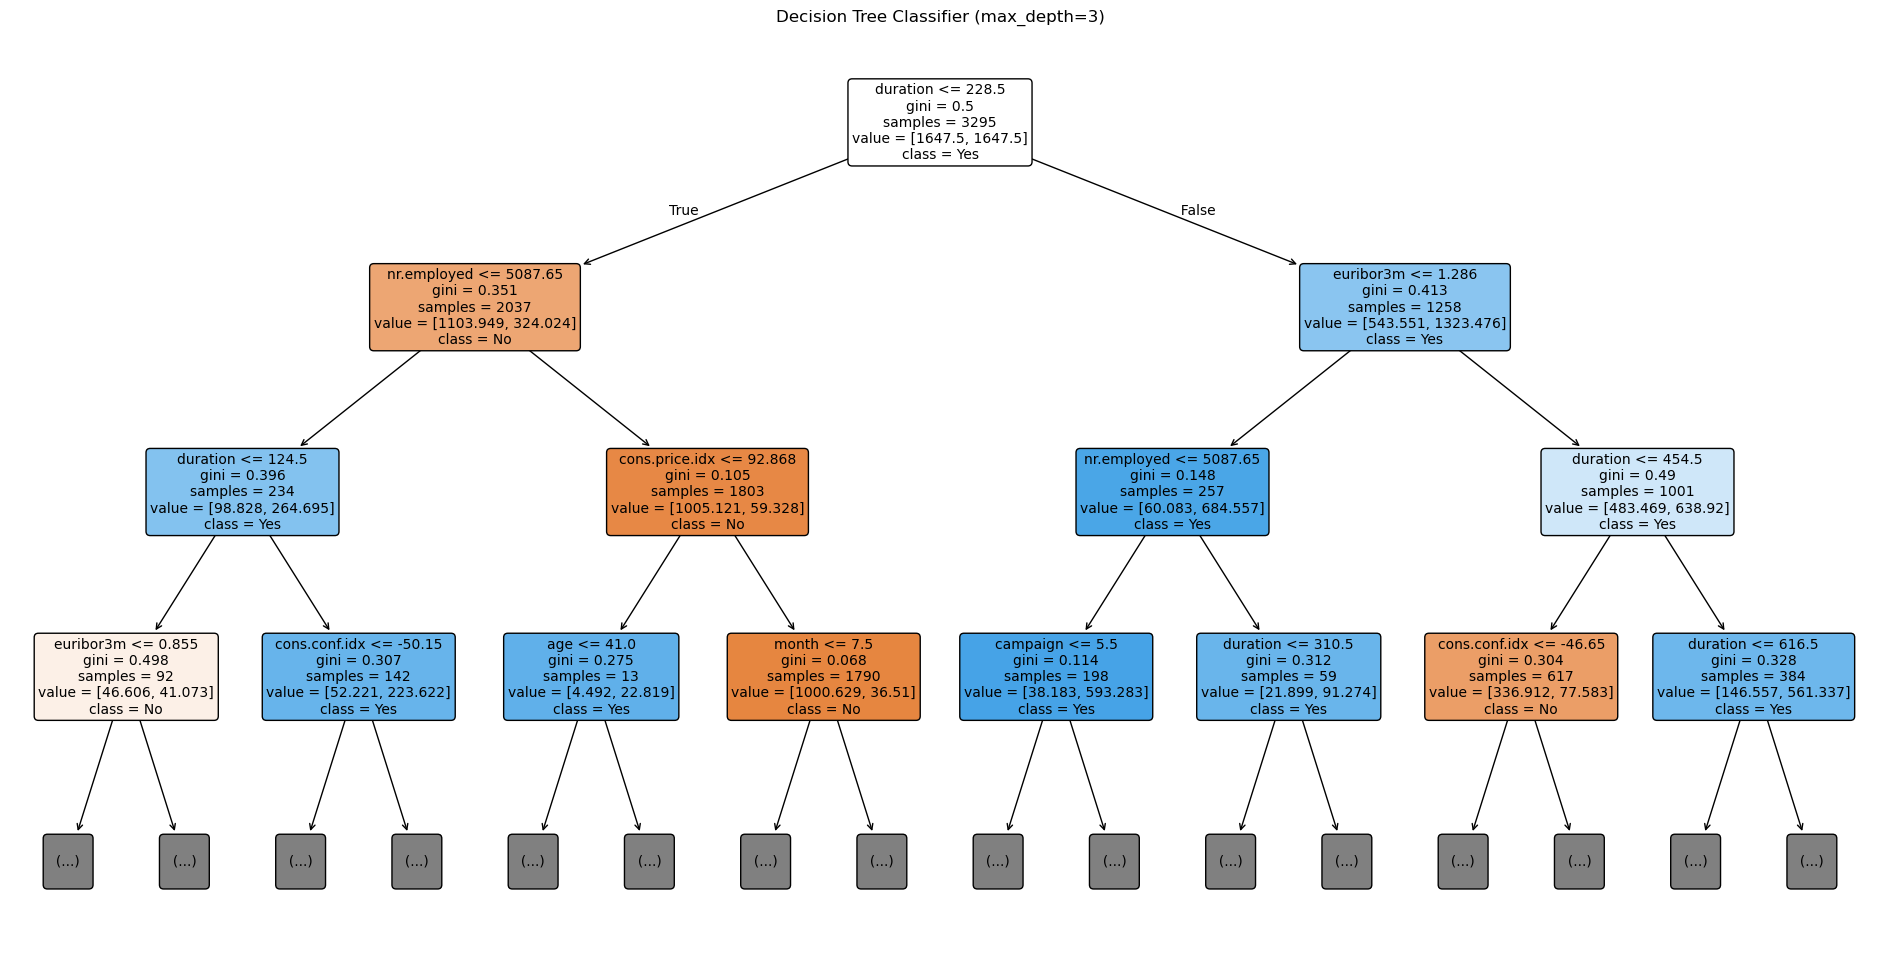

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(24, 12))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth= 3, # optional: limits depth for readability
)
plt.title("Decision Tree Classifier (max_depth=3)")
plt.show()
